In [1]:
from proj_utils import *
import os, struct
import numpy as np
import cv2
from keras.utils import to_categorical
from skimage import exposure

from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path = os.path.join(os.path.curdir, 'data')
x_train, y_train = load_NMNIST('training', digits=[0,1,2], path=path)
x_test, y_test = load_NMNIST('testing', digits=[0,1,2], path=path)

x_train = np.reshape(x_train, (len(x_train), 28,28, 1))
x_test = np.reshape(x_test, (len(x_test), 28,28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
#x = x_train
#p2, p98 = np.percentile(x, (2, 98)) #####
#x = exposure.rescale_intensity(x, in_range=(p2, p98)) #####

#x = exposure.equalize_hist(x) #####
#x_train = x
#x_train.shape

Checking multiple training vectors by plotting images.
Be patient:


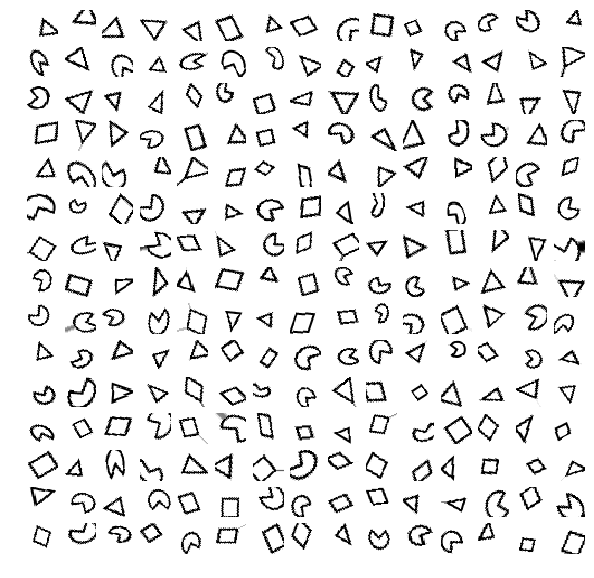

In [31]:
datagen = ImageDataGenerator(
        zca_whitening = True,
        rotation_range=360,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

batch = datagen.flow(x_train, batch_size=15*15)
inp = next(batch)
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
i = 0
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        v = inp[i]
        i += 1
        plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
        plt.axis('off')
plt.show()

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [6]:
# dimensions of our images.
img_width, img_height = 28, 28

epochs = 500
batch_size = 64
input_shape = (img_width, img_height, 1)

In [7]:
from keras.models import Sequential
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (1, 1), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('sigmoid'))
    return model

In [8]:
train_datagen = ImageDataGenerator(
        zca_whitening = True,
        rotation_range=360,
        width_shift_range=0.3,
        height_shift_range=0.3,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(
        rescale=1. / 255)

train_generator = train_datagen.flow(x_train, y_train,
                                     #target_size=(img_width, img_height),
                                     #class_mode='categorical',
                                     batch_size=batch_size)
validation_generator = test_datagen.flow(x_test, y_test)

In [9]:
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import SGD
from keras.metrics import categorical_accuracy

checkpoint_filename = 'simple_model.best_weights.hdf5'
callback_list = [TensorBoard(log_dir='/tmp/simple_model'),
                 ModelCheckpoint(checkpoint_filename, monitor='val_acc', verbose=2, save_best_only=True, mode=max,save_weights_only=True),
                 ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5)]

model = build_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=x_test.shape[0] // batch_size,
    callbacks=callback_list)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:376: RuntimeWarning: ModelCheckpoint mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/500
937/937 [==============================] - 7s 8ms/step - loss: 1.0564 - acc: 0.4134 - val_loss: 1.0658 - val_acc: 0.4521
Epoch 2/500
937/937 [==============================] - 7s 8ms/step - loss: 0.8125 - acc: 0.6465 - val_loss: 0.7798 - val_acc: 0.7185
Epoch 3/500
937/937 [==============================] - 7s 7ms/step - loss: 0.6196 - acc: 0.7523 - val_loss: 0.7124 - val_acc: 0.7800
Epoch 4/500
937/937 [==============================] - 7s 7ms/step - loss: 0.5334 - acc: 0.7904 - val_loss: 0.7317 - val_acc: 0.7780
Epoch 5/500
937/937 [==============================] - 7s 7ms/step - loss: 0.4639 - acc: 0.8243 - val_loss: 0.5618 - val_acc: 0.8139
Epoch 6/500
937/937 [==============================] - 7s 7ms/step - loss: 0.4297 - acc: 0.8385 - val_loss: 0.6892 - val_acc: 0.8031
Epoch 7/500
937/937 [==============================] - 7s 7ms/step - loss: 0.4004 - acc: 0.8506 - val_loss: 0.6554 - val_acc: 0.8143
Epoch 8/500
937/937 [==============================] - 7s 7ms/step - 

Epoch 44/500
930/937 [============================>.] - ETA: 0s - loss: 0.1621 - acc: 0.9434Epoch 00044: val_acc did not improve

Epoch 00044: reducing learning rate to 6.25000029686e-05.
937/937 [==============================] - 7s 7ms/step - loss: 0.1620 - acc: 0.9434 - val_loss: 0.6012 - val_acc: 0.8688
Epoch 45/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1593 - acc: 0.9445 - val_loss: 0.6115 - val_acc: 0.8702
Epoch 46/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1591 - acc: 0.9448 - val_loss: 0.5917 - val_acc: 0.8724
Epoch 47/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1589 - acc: 0.9445 - val_loss: 0.6320 - val_acc: 0.8700
Epoch 48/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1593 - acc: 0.9446 - val_loss: 0.6291 - val_acc: 0.8692
Epoch 49/500
934/937 [============================>.] - ETA: 0s - loss: 0.1575 - acc: 0.9455Epoch 00049: val_acc did not improve

Epoch 00049: reducing lea

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



937/937 [==============================] - 7s 7ms/step - loss: 0.1493 - acc: 0.9477 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 136/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1509 - acc: 0.9465 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 137/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1532 - acc: 0.9467 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 138/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1549 - acc: 0.9467 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 139/500
934/937 [============================>.] - ETA: 0s - loss: 0.1513 - acc: 0.9459Epoch 00139: val_acc did not improve

Epoch 00139: reducing learning rate to 1.19209295213e-10.
937/937 [==============================] - 7s 7ms/step - loss: 0.1512 - acc: 0.9459 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 140/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1501 - acc: 0.9476 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 141/500
937/937 [======

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



937/937 [==============================] - 7s 7ms/step - loss: 0.1569 - acc: 0.9450 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 239/500
932/937 [============================>.] - ETA: 0s - loss: 0.1542 - acc: 0.9463Epoch 00239: val_acc did not improve

Epoch 00239: reducing learning rate to 1.13686843121e-16.
937/937 [==============================] - 7s 7ms/step - loss: 0.1542 - acc: 0.9463 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 240/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1527 - acc: 0.9471 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 241/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1513 - acc: 0.9480 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 242/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1534 - acc: 0.9470 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 243/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1547 - acc: 0.9457 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 244/500
929/937 [======

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



937/937 [==============================] - 7s 7ms/step - loss: 0.1560 - acc: 0.9459 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 343/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1557 - acc: 0.9460 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 344/500
933/937 [============================>.] - ETA: 0s - loss: 0.1534 - acc: 0.9461Epoch 00344: val_acc did not improve

Epoch 00344: reducing learning rate to 5.42101111991e-23.
937/937 [==============================] - 7s 7ms/step - loss: 0.1537 - acc: 0.9461 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 345/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1528 - acc: 0.9474 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 346/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1566 - acc: 0.9456 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 347/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1513 - acc: 0.9472 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 348/500
937/937 [======

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



937/937 [==============================] - 7s 7ms/step - loss: 0.1568 - acc: 0.9456 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 444/500
936/937 [============================>.] - ETA: 0s - loss: 0.1573 - acc: 0.9451Epoch 00444: val_acc did not improve

Epoch 00444: reducing learning rate to 5.16987907401e-29.
937/937 [==============================] - 7s 7ms/step - loss: 0.1573 - acc: 0.9452 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 445/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1523 - acc: 0.9476 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 446/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1556 - acc: 0.9453 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 447/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1525 - acc: 0.9470 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 448/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1504 - acc: 0.9481 - val_loss: 0.6264 - val_acc: 0.8672
Epoch 449/500
934/937 [======

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



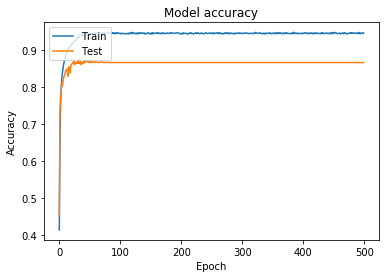

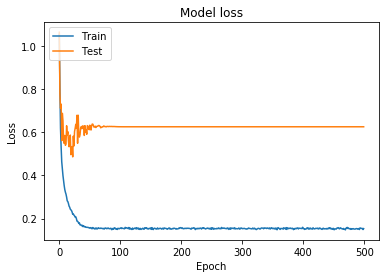

In [10]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
model_new = build_model()
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_new.load_weights('simple_model.best_weights.hdf5')
iv3_test_scores = model_new.evaluate_generator(validation_generator)
print("Accuracy: %.2f%%" % (iv3_test_scores[1]*100))

Accuracy: 87.88%


In [12]:
probabilities = model_new.predict_generator(validation_generator)
probabilities.shape

(10000, 3)

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = probabilities.argmax(axis=1)
print(y_pred.shape)
confusion_matrix(y_test.argmax(axis=1), probabilities.argmax(axis=1))

(10000,)


array([[1473,  838, 1079],
       [1414,  842, 1037],
       [1416,  838, 1063]])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), probabilities.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.34      0.43      0.38      3390
          1       0.33      0.26      0.29      3293
          2       0.33      0.32      0.33      3317

avg / total       0.34      0.34      0.33     10000



In [15]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test.argmax(axis=1), probabilities.argmax(axis=1))


0.3378

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    print(y_pred)
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [17]:
labels = {
    0 : 'Triangle',
    1: 'Square',
    2: 'Pizza'
}

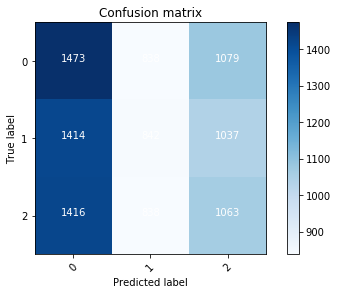

In [39]:
y_pred = model_new.predict_generator(validation_generator)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plot_confusion_matrix(matrix,classes=list(labels.keys()))

In [54]:
count = 0
mat = np.zeros((3,3))
for i in range(len(y_test)):
    mat[y_test[i].argmax()][y_pred[i].argmax()] += 1
    if (y_test[i].argmax() != y_pred[i].argmax()):
        count += 1
print(count)
#print(i, y_test[i].argmax(), y_pred[i].argmax())
print(mat, mat.sum())
tf.keras.backend.eval(K.cast(K.equal(K.argmax(y_test, axis=-1),
                          K.argmax(y_pred, axis=-1)),
                  K.floatx()))

6622
(array([[1473.,  838., 1079.],
       [1414.,  842., 1037.],
       [1416.,  838., 1063.]]), 10000.0)


array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [41]:
import tensorflow as tf
tf.keras.backend.eval(K.mean(K.equal(K.argmax(y_test, axis=-1), K.argmax(y_pred, axis=-1))))

0.3378

In [27]:
model.metrics_names

['loss', 'acc']

[0 0 0 ... 0 0 0]
Accuracy : 0.3396

Classification Report
             precision    recall  f1-score   support

          0    0.33920   1.00000   0.50658      3390
          1    0.00000   0.00000   0.00000      3293
          2    1.00000   0.00181   0.00361      3317

avg / total    0.44669   0.33960   0.17293     10000

[[3390    0    0]
 [3293    0    0]
 [3311    0    6]]


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


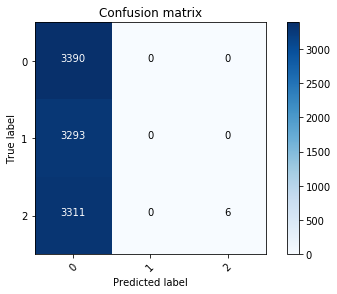

In [19]:
full_multiclass_report(model,
                       x_test,
                       y_test,
                       classes=labels.keys())

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

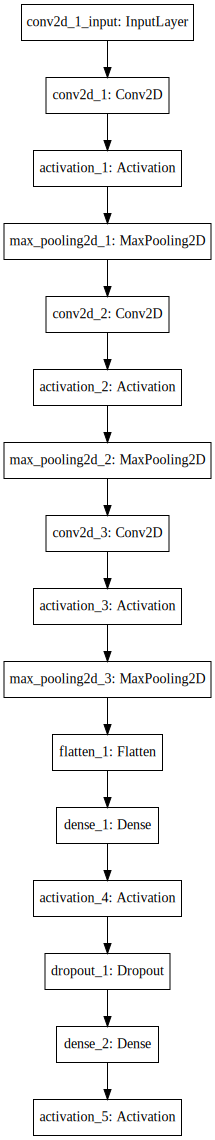

In [21]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
__________